In [50]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

fig_DIR = "../figs/teams/"

In [60]:
cols = ['GP', 'PTS_OFF_TOV',
    'PTS_2ND_CHANCE', 'PTS_FB', 'PTS_PAINT', 'OPP_PTS_OFF_TOV',
    'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT',]
dfa, dfb = [], []
for year in range(2013,2023):
    stats = leaguedashteamstats.LeagueDashTeamStats(
        per_mode_detailed="PerGame",
        season_type_all_star="Playoffs",
        measure_type_detailed_defense="Misc",
        season = get_ss(year),
    )
    df1 = stats.get_data_frames()[0]
    teams = df1["TEAM_ID"].to_list()
    df2 = df1[cols]
    for c in cols[1:]:
        df2[c] = df2["GP"]*df2[c]
    df3 = pd.DataFrame(df2.sum()).T
    for c in cols[1:]:
        df3[c] = round(df3[c]/df3["GP"],1)
    df3["Season"] = year + 1
    df42 = df3.copy()
    stats = leaguedashteamstats.LeagueDashTeamStats(
        per_mode_detailed="PerGame",
        season_type_all_star="Regular Season",
        measure_type_detailed_defense="Misc",
        season = get_ss(year),
    )
    df1 = stats.get_data_frames()[0]
    cols = ['GP', 'PTS_OFF_TOV',
        'PTS_2ND_CHANCE', 'PTS_FB', 'PTS_PAINT', 'OPP_PTS_OFF_TOV',
        'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT',]
    df1 = df1[df1["TEAM_ID"].isin(teams)]
    df2 = df1[cols]
    for c in cols[1:]:
        df2[c] = df2["GP"]*df2[c]
    df3 = pd.DataFrame(df2.sum()).T
    for c in cols[1:]:
        df3[c] = round(df3[c]/df3["GP"],1)
    df3["Season"] = year + 1
    df41 = df3.copy()
    dfa.append(df41)
    dfb.append(df42)
df51 = pd.concat(dfa)
df52 = pd.concat(dfb)

In [61]:
df51["Segment"] = "Regular"
df52["Segment"] = "Playoffs"
df5 = pd.concat([df51,df52])

In [62]:
df5.columns

Index(['GP', 'PTS_OFF_TOV', 'PTS_2ND_CHANCE', 'PTS_FB', 'PTS_PAINT',
       'OPP_PTS_OFF_TOV', 'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT',
       'Season', 'Segment'],
      dtype='object')

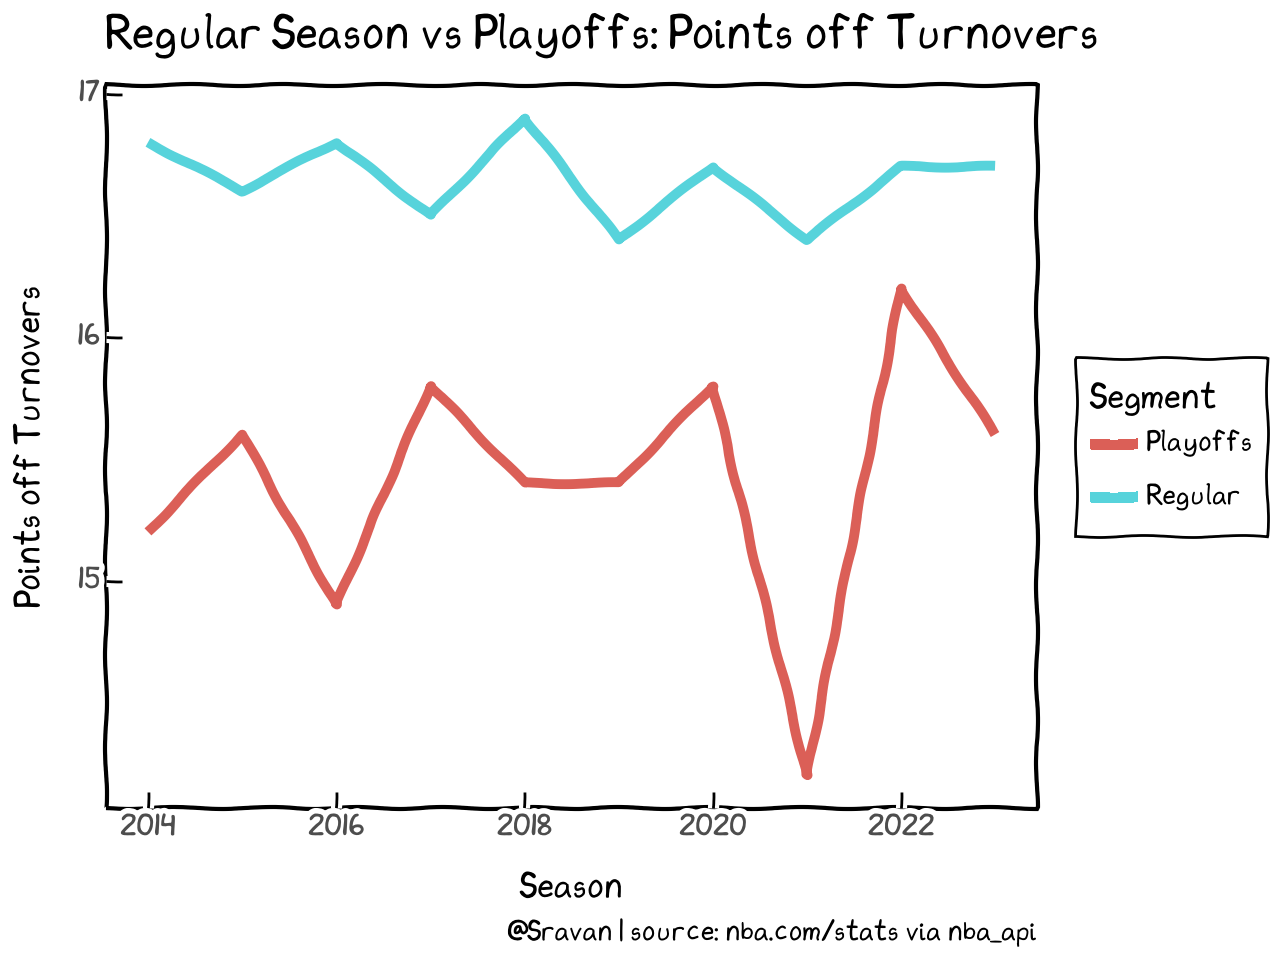

<Figure Size: (640 x 480)>

In [63]:
var = "PTS_OFF_TOV"
vari = "Points off Turnovers"
p = (
    ggplot(df5,aes(x="Season",y=var,group="Segment",color="Segment"))
    + geom_line(size=2)
    + theme_idv
    + labs(
        y=vari,
        title="Regular Season vs Playoffs: "+vari,
        caption="@Sravan | source: nba.com/stats via nba_api" 
    )
)
p

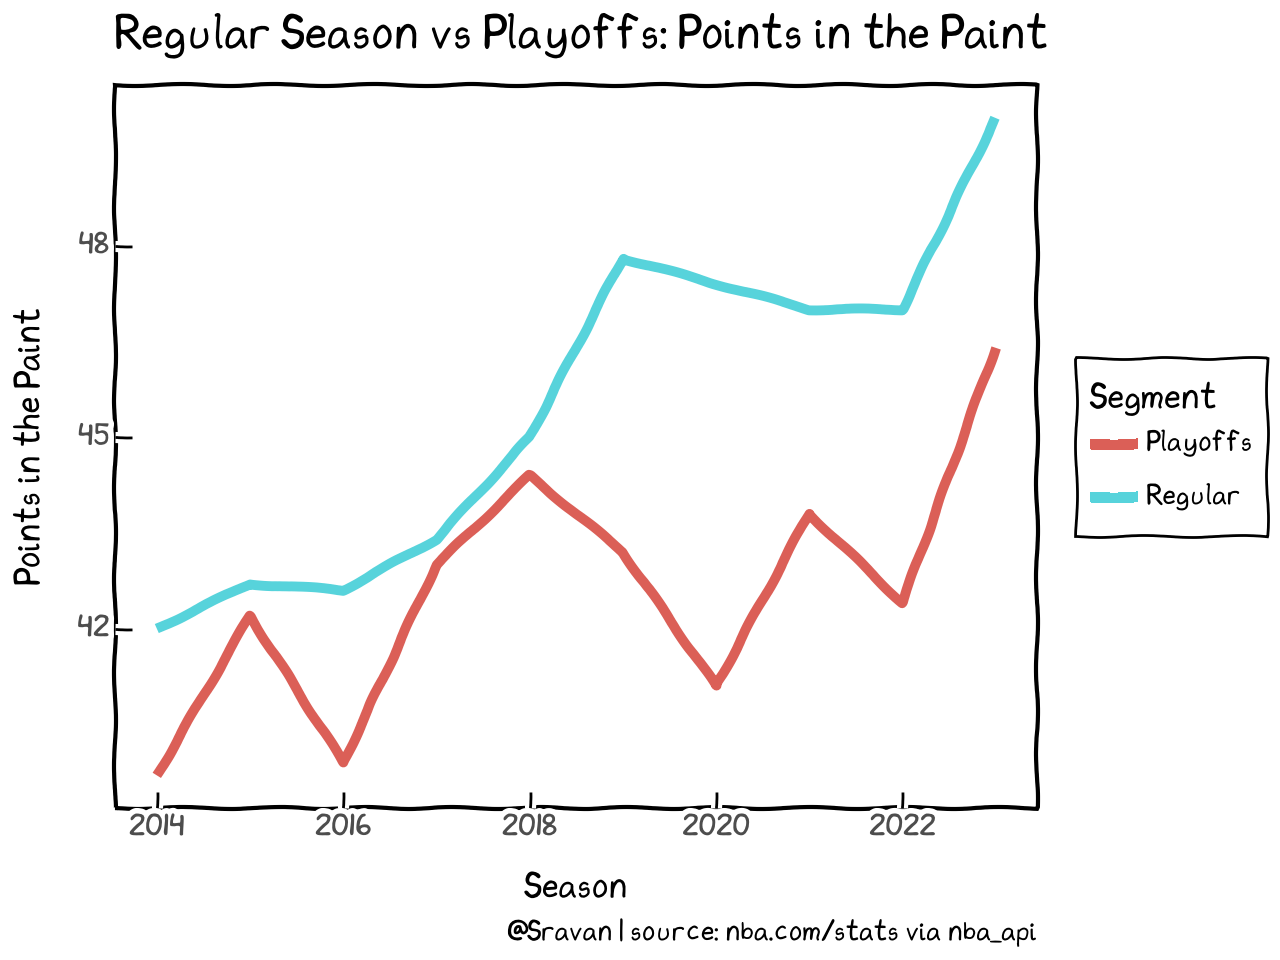

<Figure Size: (640 x 480)>

In [64]:
var = "PTS_PAINT"
vari = "Points in the Paint"
p = (
    ggplot(df5,aes(x="Season",y=var,group="Segment",color="Segment"))
    + geom_line(size=2)
    + theme_idv
    + labs(
        y=vari,
        title="Regular Season vs Playoffs: "+vari,
        caption="@Sravan | source: nba.com/stats via nba_api" 
    )
)
p